<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Lesson_4_CNN_Pro_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolbold textutional Neural Network 
### Used mainly for image processing.

#### Different Padding in CNN for how filter should cover the original image.

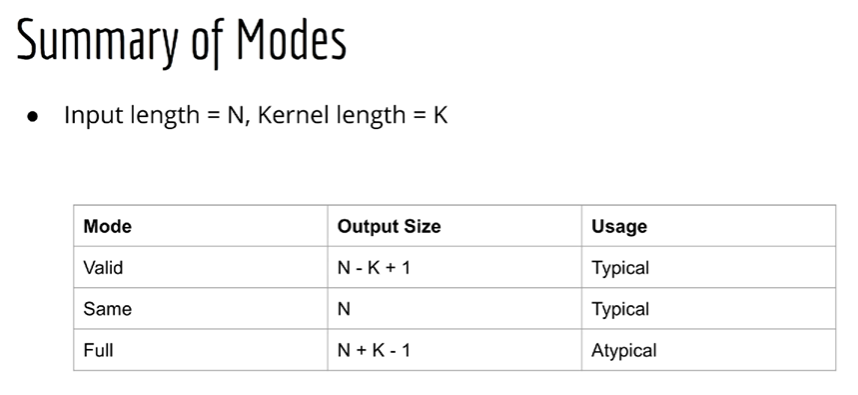

Cosine similarity is used to compare two vectors (two pixel of images), so convolution is correlation. 
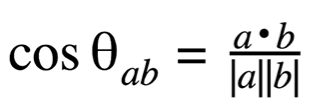

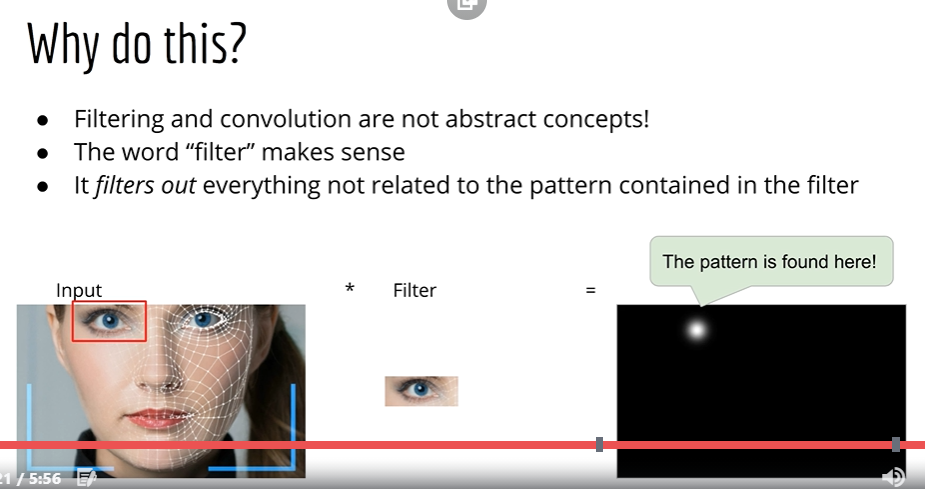


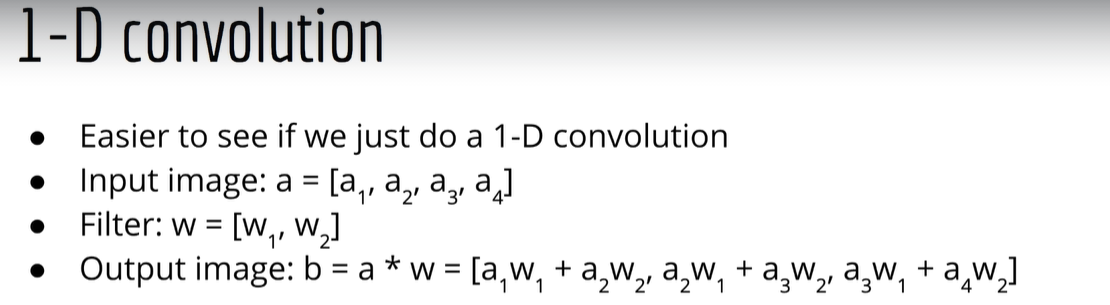

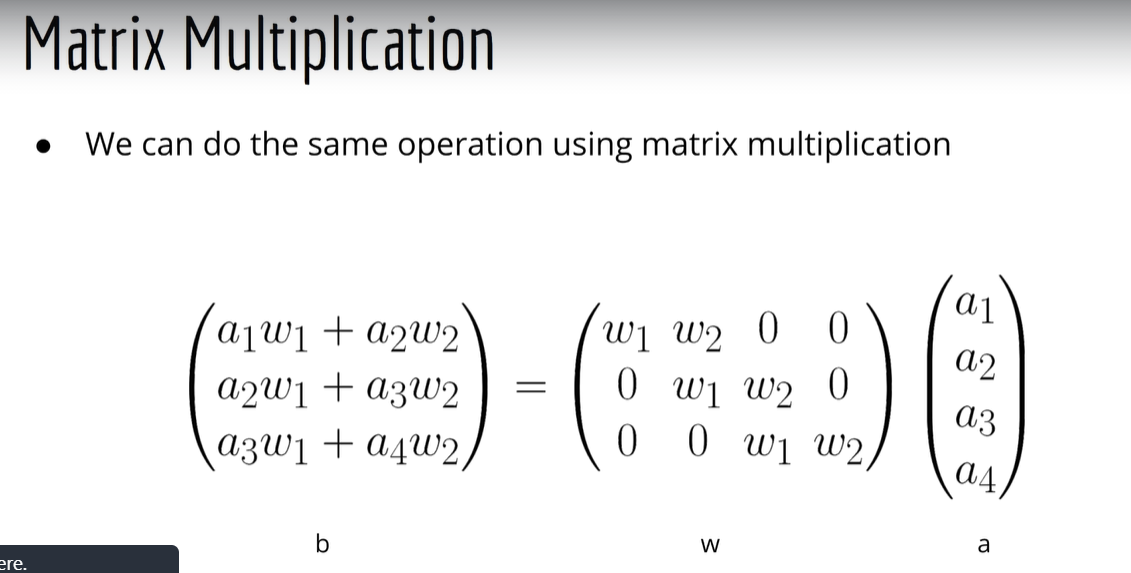

### Translational Invariance
When using a fuly Dense NN for image recognition, NN needs to be trained to find a pattern in each different pixel of the picture, but when sharing weights (pattern) via CNN, NN learns how to find a same pattern in different location of an image.


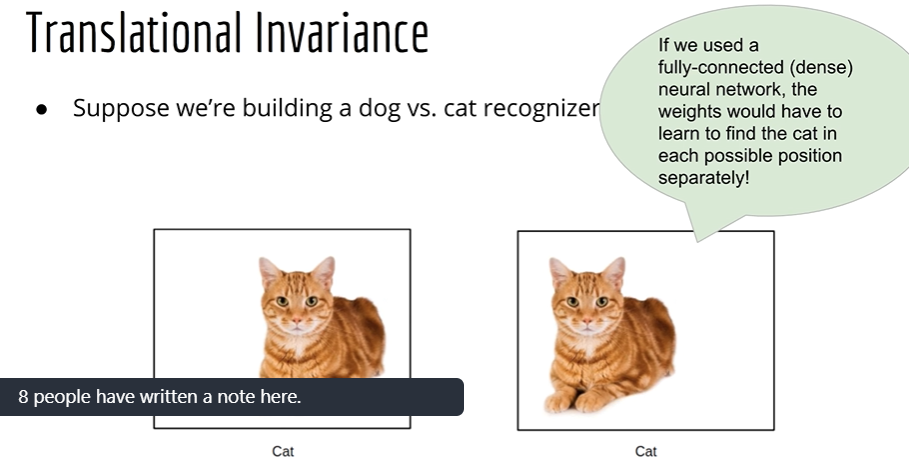

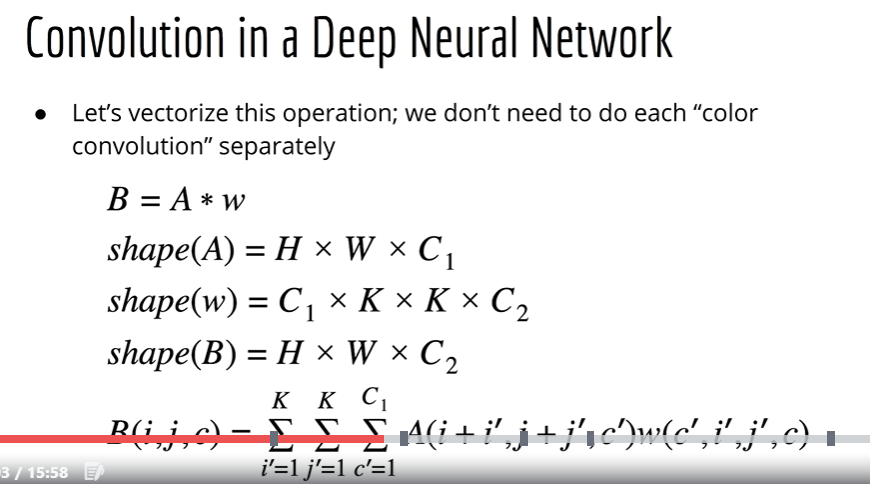

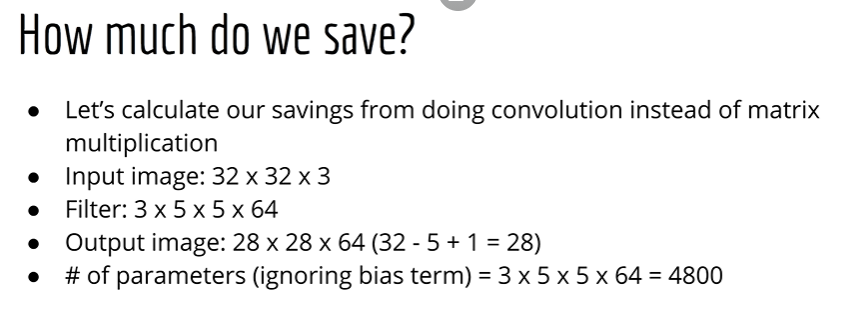

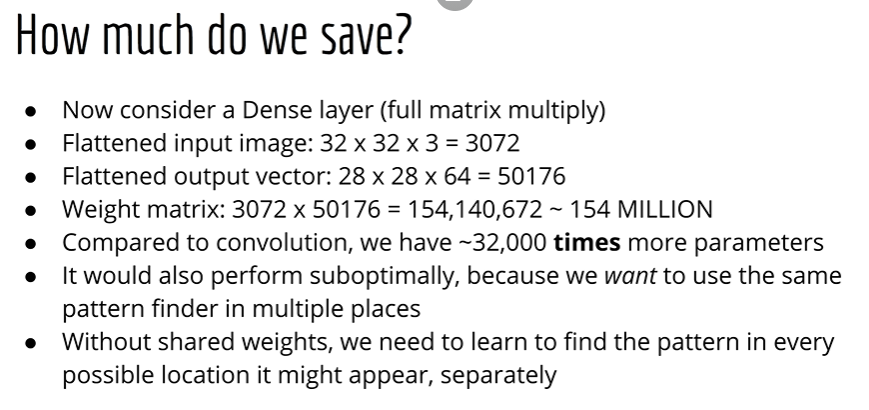

#### There difference between DEnse NN and CNN is the Translational Invariance which is:
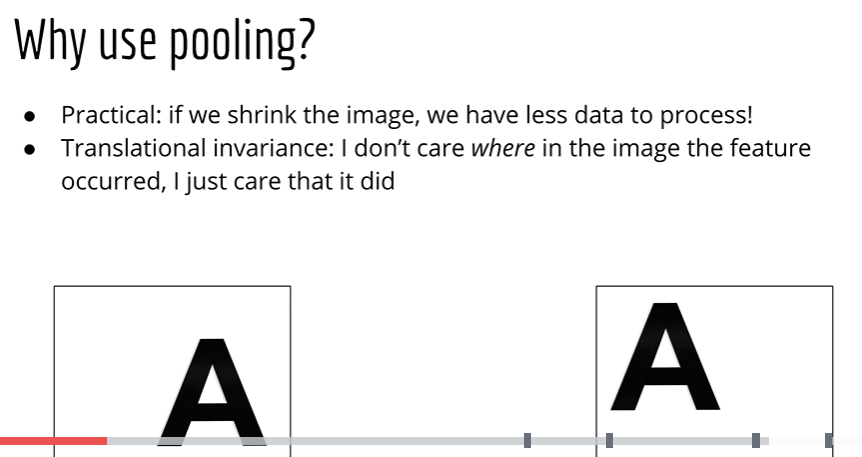

### There is a hierarchical learning for CNN, meaning that it will learn the details first and as it progresses it will learn more of the general things. It starts from edge and details and ends up with overal aspect of an image.

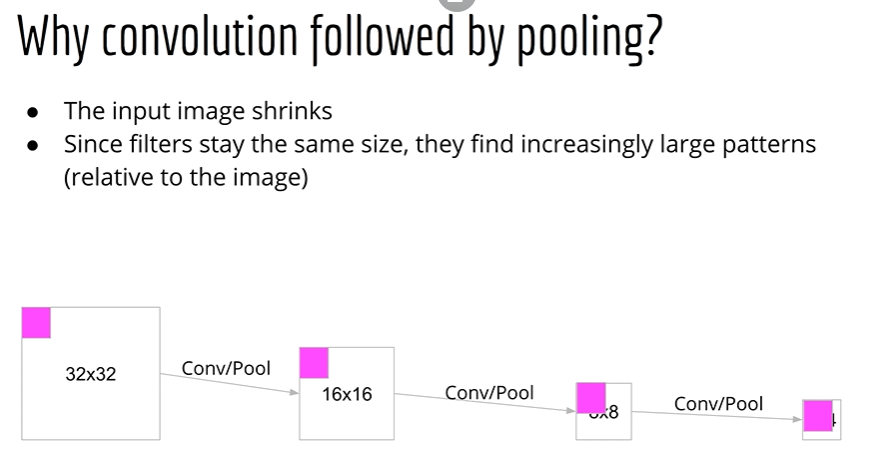

### That is why the number of features must increase as size of image decreases due to pooling

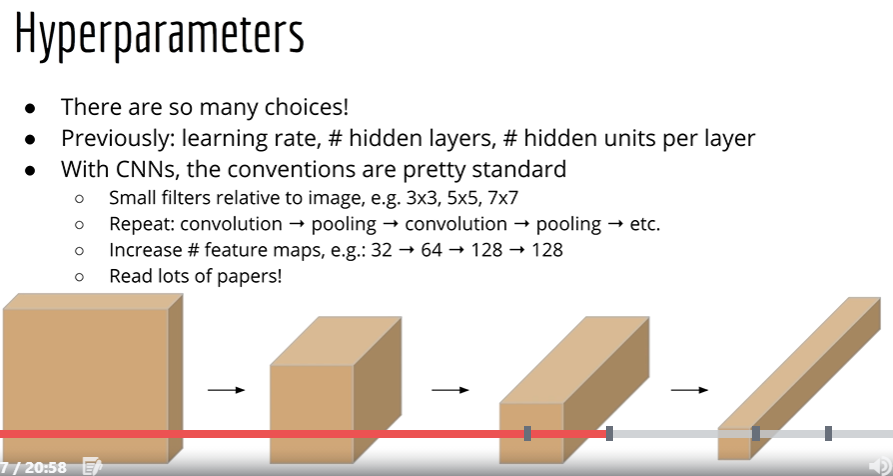

## Strided Convolution
By using stride we can redue the size of image so we do not need pooling anymore. Using the stride size of 2 we can shrinke the size of image by half. Intuition beyond it, is that we donot expect too much variation when move from one pixel to it's neighbour pixels.

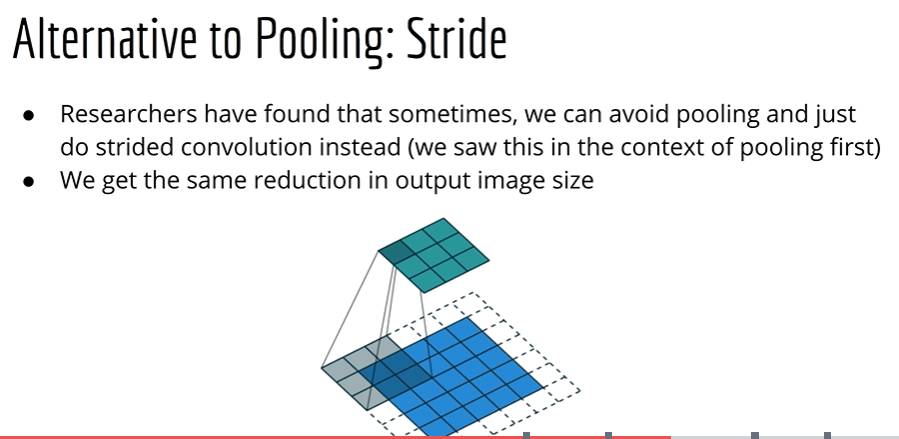

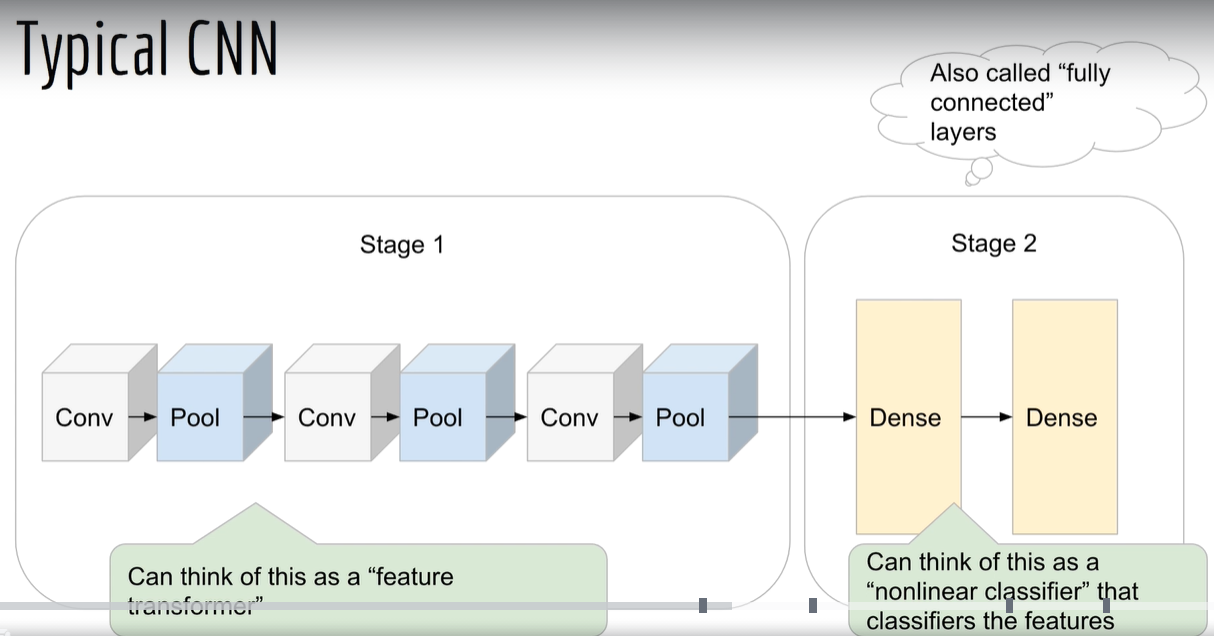

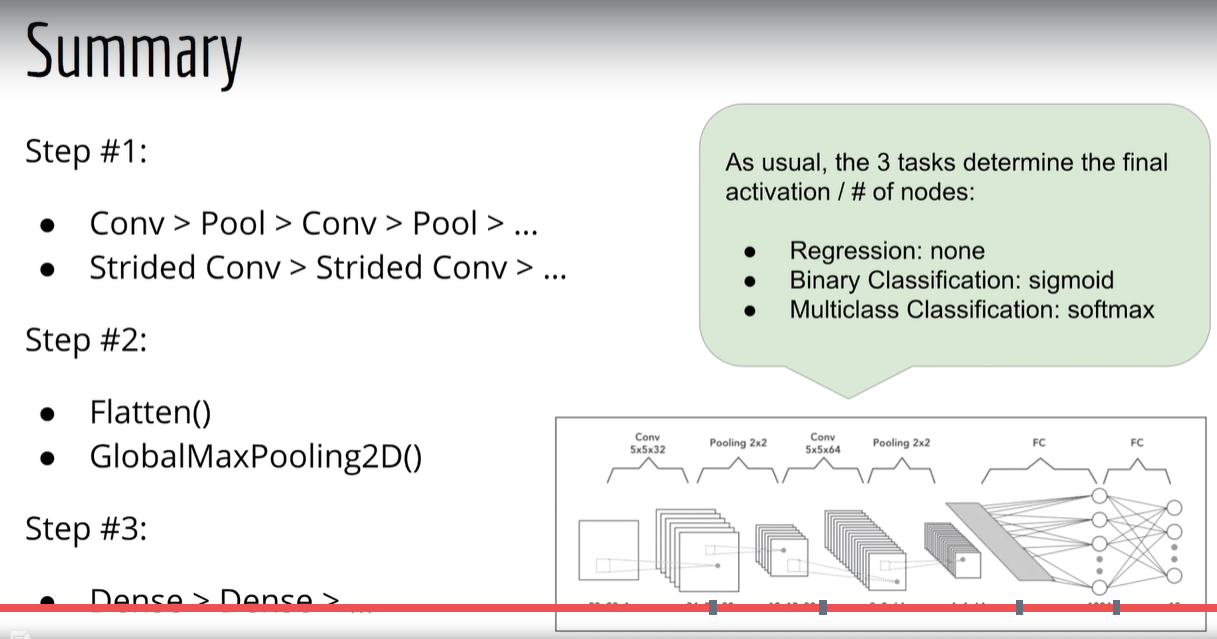

### Project: Fashion MNIST and CIFAR-10 database

#### Fashion MNIST

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
dataset, dataset_info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWKGRHM/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWKGRHM/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Check that dataset is a dictionary
print('dataset has type:', type(dataset))

# Print the keys of the dataset dictionary
print('\nThe keys of dataset are:', list(dataset.keys()))

dataset has type: <class 'dict'>

The keys of dataset are: ['test', 'train']


In [ ]:
## get the dataset size
num_training_examples = X_train.shape[0]
num_test_examples = X_test.shape[0]

In [ ]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

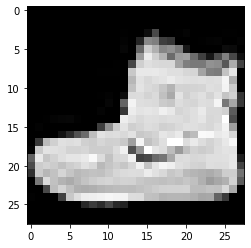

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# number of categories
k = np.unique(y_train).shape[0]

In [ ]:
## preprocessing the images
processed_train = X_train.reshape((-1,28,28,1))/np.max(X_train[0])
processed_test = X_test.reshape((-1,28,28,1))/np.max(X_test[0])
print(processed_train.shape), 
print(processed_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [ ]:
## set up the model

i = Input(shape = processed_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2) (x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2) (x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

# model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [ ]:
# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# model evaluation
model.evaluate(processed_train, y_train.reshape(-1))

1875/1875 [==============================] - 9s 5ms/step - loss: 2.2978 - accuracy: 0.1234


[2.297775983810425, 0.12338333576917648]

In [ ]:
# model tunning
EPOCHS = 15
history = model.fit(processed_train, y_train, validation_data=(processed_test, y_test), epochs=EPOCHS)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5260 - accuracy: 0.8057 - val_loss: 0.4090 - val_accuracy: 0.8460
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3556 - accuracy: 0.8665 - val_loss: 0.3577 - val_accuracy: 0.8689
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3046 - accuracy: 0.8856 - val_loss: 0.3119 - val_accuracy: 0.8853
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2681 - accuracy: 0.8992 - val_loss: 0.3201 - val_accuracy: 0.8836
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2382 - accuracy: 0.9094 - val_loss: 0.3069 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2167 - accuracy: 0.9184 - val_loss: 0.3257 - val_accuracy: 0.8916
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1951 - accuracy: 0.9271 - val_loss: 0.3095 -

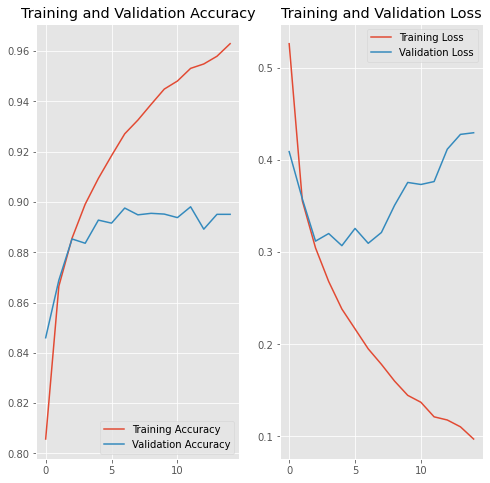

In [ ]:
# plot the accuracy and loss function
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Confusion matrix, without normalization
[[877   0  20  22   1   1  75   0   4   0]
 [  1 972   1  17   3   0   2   0   4   0]
 [ 24   0 838  10  50   0  77   0   1   0]
 [ 11   5  18 911  29   0  24   0   2   0]
 [  4   0  74  24 819   0  74   0   5   0]
 [  1   0   0   1   0 969   0  16   3  10]
 [152   0  65  30  73   0 671   0   9   0]
 [  1   0   0   0   0  21   0 936   1  41]
 [  5   0   3   5   2   1   4   1 978   1]
 [  1   0   0   0   0   1   0  18   0 980]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


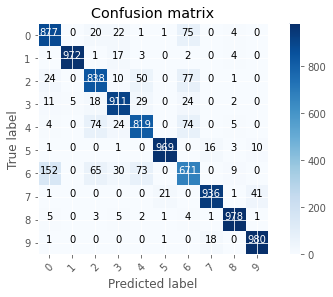

In [ ]:
# Plot confusion matrix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  ax = plt.axes()
  ax.set(xlabel='Predicted label', ylabel='True label')
  plt.show()


p_test = model.predict(processed_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: Sneaker but Predicted: Ankle boot')

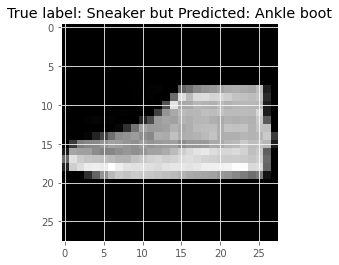

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s but Predicted: %s" % (class_names[y_test[i]], class_names[p_test[i]]))

### CIFAR database

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# Check that dataset
print('train set has dimension:', X_train.shape)
print('test set has dimension:', X_test.shape)
print('train y set has dimension:', y_train.shape)
print('test y set has dimension:', y_test.shape)
print('\n')
print('number of categories:', len(np.unique(y_train)))

train set has dimension: (50000, 32, 32, 3)
test set has dimension: (10000, 32, 32, 3)
train y set has dimension: (50000, 1)
test y set has dimension: (10000, 1)


number of categories: 10


In [ ]:
# import necessaries
from tensorflow.keras.layers import Conv3D, GlobalMaxPooling2D

In [ ]:
# modify dimension as needed
X_train = X_train/np.max(X_train[0])
X_test = X_test/np.max(X_test[0])
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [ ]:
y_test.flatten().shape

(10000,)

In [ ]:
# set the model
i = Input(shape = X_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same')(i)
x = Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same')(x)
x = Conv2D(filters=128, kernel_size=(3,3), strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(np.unique(y_train)), activation='softmax')(x)

model = Model(i, x)

# model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [ ]:
# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
EPOCHS = 15
histry = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6890 - accuracy: 0.3985 - val_loss: 1.4890 - val_accuracy: 0.4682
Epoch 2/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4415 - accuracy: 0.4879 - val_loss: 1.3453 - val_accuracy: 0.5232
Epoch 3/15
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3207 - accuracy: 0.5336 - val_loss: 1.3348 - val_accuracy: 0.5314
Epoch 4/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2278 - accuracy: 0.5620 - val_loss: 1.2970 - val_accuracy: 0.5419
Epoch 5/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1378 - accuracy: 0.5956 - val_loss: 1.2697 - val_accuracy: 0.5626
Epoch 6/15
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0527 - accuracy: 0.6212 - val_loss: 1.2924 - val_accuracy: 0.5524
Epoch 7/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9613 - accuracy: 0.6536 - val_loss: 1.3495 -

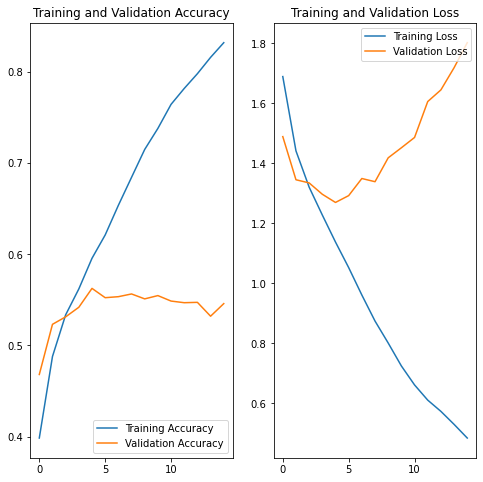

In [ ]:
# plot the accuracy and loss function
training_accuracy = histry.history['accuracy']
validation_accuracy = histry.history['val_accuracy']

training_loss = histry.history['loss']
validation_loss = histry.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Confusion matrix, without normalization
[[606  28  52  27  30  10  22  25 130  70]
 [ 41 648  10  24  12  13  13  13  63 163]
 [ 71  16 422 117 118  88  68  53  22  25]
 [ 30  14  77 453  53 179  99  33  30  32]
 [ 36  14 148  89 437  80  84  62  37  13]
 [ 19  10  76 300  61 392  46  54  20  22]
 [ 15  25  66 138  88  56 569   8  13  22]
 [ 37  11  41  90  76  84  20 586  14  41]
 [ 91  55  10  38  15  22   5  12 684  68]
 [ 52 123  20  43   9  14  11  24  42 662]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


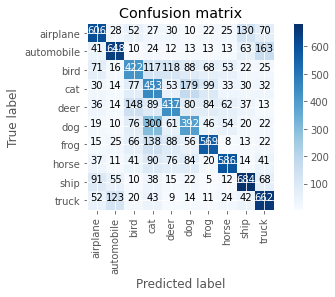

In [ ]:
# Plot confusion matrix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  ax = plt.axes()
  ax.set(xlabel='Predicted label', ylabel='True label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

Text(0.5, 1.0, 'True label: airplane but Predicted: cat')

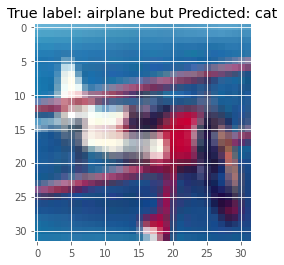

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s but Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

## Improving the prediction

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
## Image generator for the train set
BATCH = 32

image_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) # , zoom_range=0.3, rotation_range=45, shear_range=0.2
train_generator = image_generator.flow(X_train, y_train, batch_size=BATCH)

In [40]:
for i in train_generator[0]:
  print(np.max(i))

1.0
9


## We use Batch normalization in CNN and the conventional template is as below.

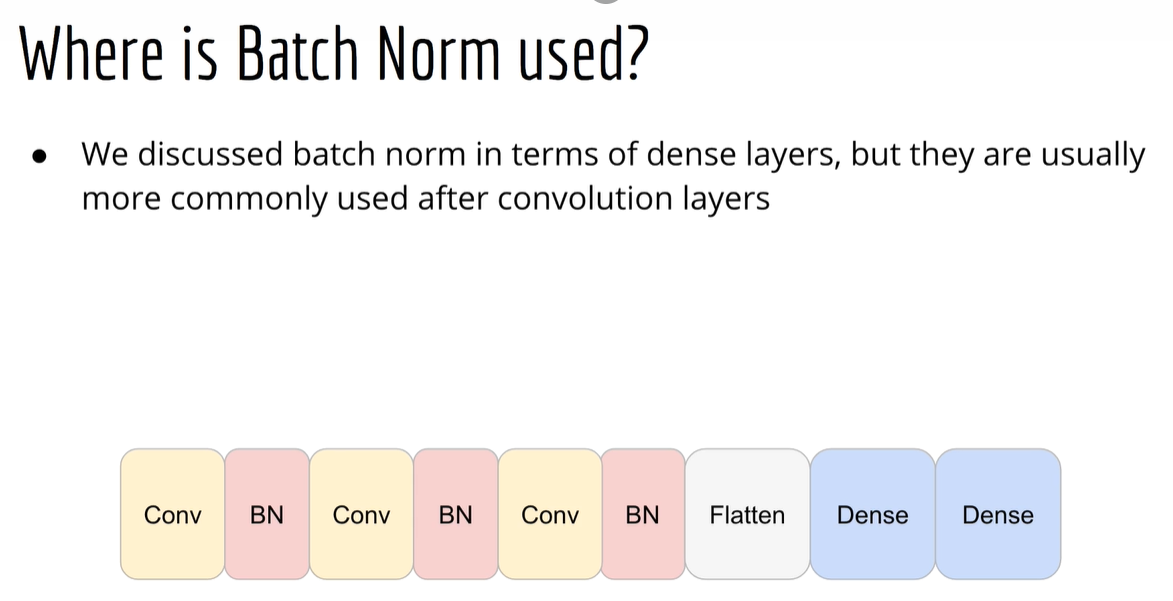

In [46]:
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization

In [54]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

### In this case a full CNN without stride and with pooling works better. We use the idea of VGG (another CNN algorithm) to use multi convolutional layers.

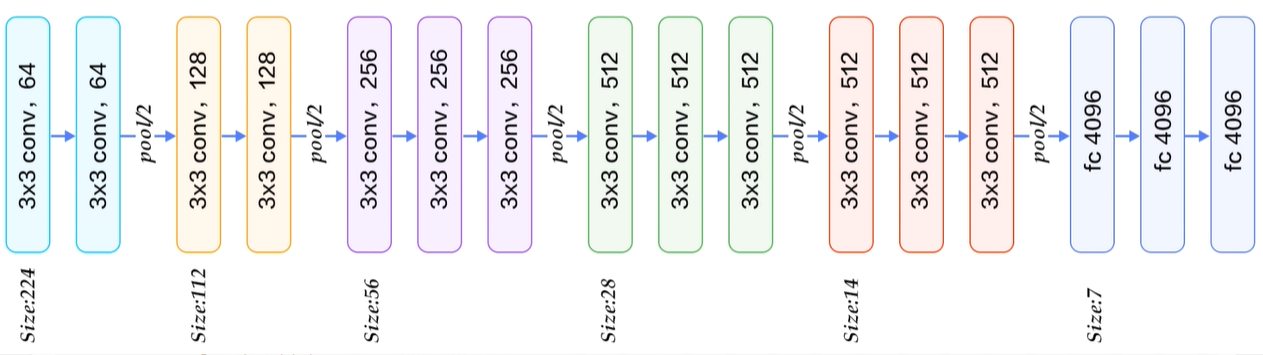

In [55]:
# re-set the model
i = Input(shape = X_train[0].shape)

# Getting idea of VGG
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(np.unique(y_train)), activation='softmax')(x)

model = Model(i, x)

# model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

In [56]:
# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
## 
Epochs = 50
step_per_epoch = X_train.shape[0] // BATCH
history = model.fit_generator(train_generator, steps_per_epoch=step_per_epoch, validation_data= (X_test, y_test), epochs=Epochs)

Epoch 1/50
1562/1562 [==============================] - 503s 322ms/step - loss: 1.5588 - accuracy: 0.4375 - val_loss: 1.1644 - val_accuracy: 0.5931
Epoch 2/50
1562/1562 [==============================] - 497s 318ms/step - loss: 1.0846 - accuracy: 0.6232 - val_loss: 1.0655 - val_accuracy: 0.6402
Epoch 3/50
1562/1562 [==============================] - 504s 322ms/step - loss: 0.9081 - accuracy: 0.6910 - val_loss: 0.8961 - val_accuracy: 0.7020
Epoch 4/50
1562/1562 [==============================] - 506s 324ms/step - loss: 0.7857 - accuracy: 0.7370 - val_loss: 0.8366 - val_accuracy: 0.7284
Epoch 5/50
1562/1562 [==============================] - 501s 321ms/step - loss: 0.7067 - accuracy: 0.7635 - val_loss: 0.7459 - val_accuracy: 0.7551
Epoch 6/50
1562/1562 [==============================] - 506s 324ms/step - loss: 0.6543 - accuracy: 0.7819 - val_loss: 0.6654 - val_accuracy: 0.7786
Epoch 7/50
1562/1562 [==============================] - 504s 322ms/step - loss: 0.6098 - accuracy: 0.7966 - val_

In [2]:
# plot the accuracy and loss function
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

Confusion matrix, without normalization
[[724  28  30  15  12   9  19  19  86  58]
 [ 20 791   9  14   5   5   6   7  31 112]
 [ 83  17 492  65 108  91  56  55  13  20]
 [ 29  18  55 394  34 287  79  49  20  35]
 [ 34   5  81  54 562  77  55 102  24   6]
 [ 19   6  32 151  38 633  35  61   8  17]
 [  9  10  47  53  57  84 704  17   8  11]
 [ 27   6  17  26  43  78   7 762   4  30]
 [ 68  58   5  17   9  11  12   7 751  62]
 [ 31 141   6  23   7   8   8  16  28 732]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


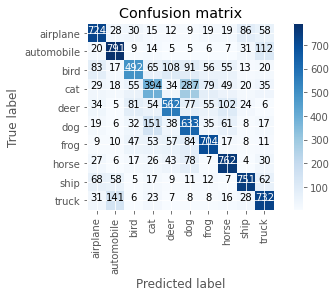

In [ ]:
# Plot confusion matrix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  ax = plt.axes()
  ax.set(xlabel='Predicted label', ylabel='True label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

### End of Document
